In [1]:
# En caso de problemas, utilizar las dependencias de librerías de este requierement: https://github.com/googlecolab/backend-info/blob/d6d345cb94fc5fd49951c9af0f6ead5e962bfab2/pip-freeze.txt
!pip install numpy==1.23.5
!pip install transformers[torch]==4.35.2
!pip install accelerate -U
!pip install evaluate

  Using cached transformers-4.35.2-py3-none-any.whl (7.9 MB)
  Using cached accelerate-0.28.0-py3-none-any.whl (290 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import pandas as pd
def load_prepare_data(path):
  """
  Función para cargar y procesar datos para el ejercicio.
  """
  df = pd.read_csv(path,sep=",")
  map_classes = {
    "religion":1,
    "age":1,
    "ethnicity":1,
    "gender":1,
    "other_cyberbullying":1,
    "not_cyberbullying":0,
  }
  df["cyberbullying"] = df.cyberbullying_type.map(map_classes)
  return df[["tweet_text","cyberbullying"]].copy()

# Ejercicio


En este ejercicio vamos a trabajar con un conjunto de datos procedente de medios sociales online.

Uno de los mayores problemas en el internet de hoy en día es la presencia de actitudes negativas hacia algunos colectivos en relación a su etnia, género, religión o ideología política. En este ejercicio trabajaremos con un conjunto de datos reales, etiquetados manualmente, procedentes de la plataforma [Kaggle](https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification/data). Originalmente, a cada documento del dataset se le asignó una de las siguientes categorías:
- *religion*
- *age*
- *ethnicity*
- *gender*
- *other_cyberbullying*
- *not_cyberbullying*


El objetivo inicial del dataset era su uso para entrenar un modelo capaz de detectar el tipo de contenido de odio presente en internet según el colectivo al que se atacaba. En este caso, para simplificar el ejercicio, se ha generado una función `load_prepare_data()` que cambia las categorías del dataset obteníendose al final 2 categorías con valor 1 o 0, indicando si el tweet tiene contenido de odio

**En este ejercicio debeis entrenar un modelo de clasificación utilizando la librería Transformers.** Dado que el análisis exploratorio ha sido realizado en el ejercicio anterior, en este caso podréis centraros en entrenar el modelo utilizando la librería Transformers, seleccionando un modelo pre-entrenado adecuado, entrenando el modelo y llevando a cabo la evaluación.


**Nota 1**: Este ejercicio requiere el uso de las GPUs de Google Colab. Este Colab debería estar preconfigurado para ejecutarse en GPU, pero si tuviera problemas en la ejecución que me contacte a través del Moodle para buscar soluciones alternativas.

## 0. Imports


In [3]:
from transformers import (
   AutoConfig,
   AutoTokenizer,
   AutoModelForSequenceClassification,
   AdamW
)
import torch
import pandas as pd
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


## 1. Obtención del corpus
Para la obtención de los datos teneis disponible la función `load_prepare_data()`. Esta función prepara los datos del ejercicio en formato Pandas dataframe para que podais realizarlo.

In [4]:
path_data = "https://raw.githubusercontent.com/luisgasco/ntic_master_datos/main/datasets/cyberbullying_tweets.csv"
dataset = load_prepare_data(path_data)

In [5]:
dataset

,tweet_text,cyberbullying
0,"In other words #katandandre, your food was cra...",0
1,Why is #aussietv so white? #MKR #theblock #ImA...,0
2,@XochitlSuckkks a classy whore? Or more red ve...,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0
4,@RudhoeEnglish This is an ISIS account pretend...,0
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",1
47688,Turner did not withhold his disappointment. Tu...,1
47689,I swear to God. This dumb nigger bitch. I have...,1
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,1


## 2. Análisis exploratorio

Podéis saltarlo en este ejercicio.

## 3. Preprocesado y Preparación de datos

In [6]:
# Habíamos visto en el ejercicio anterior la presencia de tweets duplicados:
print('shape con duplicados:', dataset.shape)
dataset.drop_duplicates(subset='tweet_text', inplace=True)
print('shape sin duplicados:', dataset.shape)

shape con duplicados: (47692, 2)
shape sin duplicados: (46017, 2)


In [7]:
# Separamos la variable objetivo de X (texto):
texts  = dataset['tweet_text'].values
labels = dataset['cyberbullying'].values

In [8]:
# Dividimos los datos en training, validation y test sets:
train_texts, test_texts, train_labels, test_labels = train_test_split(
    texts, labels,
    test_size=0.2,
    stratify=labels,
    random_state=0
)

train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_texts, train_labels,
    test_size=0.2,
    stratify=train_labels,
    random_state=0
)

print('Train set shapes     :', train_texts.shape, train_labels.shape)
print('Validation set shapes:', val_texts.shape, val_labels.shape)
print('Test set shapes      :', test_texts.shape, test_labels.shape)

Train set shapes     : (29450,) (29450,)
Validation set shapes: (7363,) (7363,)
Test set shapes      : (9204,) (9204,)


In [9]:
# Vamos a trabajar con el mismo transformer tipo encoder como en clase:
# "bert-base-uncased"
name_model = 'bert-base-uncased'

# Cargamos el tokenizador específico del modelo:
tokenizer_model = AutoTokenizer.from_pretrained(name_model)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [10]:
# Comprobamos dicho tokenizer:
tweet_random = dataset['tweet_text'].sample(1).iloc[0]
tokens = tokenizer_model(tweet_random).tokens()
print(tweet_random, '\n')
tokens

Islam encourages marital violence being your proof :) And I don't think that many religions are really more polite than islam, looking especially at Christianity All they did was change it for the masses Thank you for showing your hidden face to the liberal muslim idiots above 



['[CLS]',
 'islam',
 'encourages',
 'marital',
 'violence',
 'being',
 'your',
 'proof',
 ':',
 ')',
 'and',
 'i',
 'don',
 "'",
 't',
 'think',
 'that',
 'many',
 'religions',
 'are',
 'really',
 'more',
 'polite',
 'than',
 'islam',
 ',',
 'looking',
 'especially',
 'at',
 'christianity',
 'all',
 'they',
 'did',
 'was',
 'change',
 'it',
 'for',
 'the',
 'masses',
 'thank',
 'you',
 'for',
 'showing',
 'your',
 'hidden',
 'face',
 'to',
 'the',
 'liberal',
 'muslim',
 'idiots',
 'above',
 '[SEP]']

In [11]:
# Utilizamos la función de la clase para preparar los
#datos al formato requerido para el entrenamiento:
import torch
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        """
        Constructor de la clase CustomDataset.
        Parámetros:
        - texts: Lista de textos.
        - labels: Lista de etiquetas correspondientes a los textos.
        - tokenizer: Objeto del tokenizador a utilizar.
        - max_length: Longitud máxima de la secuencia después de la tokenización.
        """
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        """
        Devuelve la longitud del conjunto de datos.
        """
        return len(self.texts)

    def __getitem__(self, idx):
        """
        Obtiene un elemento del conjunto de datos.

        Parámetros:
        - idx: Índice del elemento a obtener.

        Devuelve:
        Un diccionario con 'input_ids', 'attention_mask' y 'labels'.
        """
        # Obtener el texto y la etiqueta del índice proporcionado
        text = str(self.texts[idx])
        label = int(self.labels[idx])

        # Tokenizar el texto
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            truncation=True,
            padding='max_length',
            return_tensors='pt'
        )

        # Devolver el diccionario con los datos
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

In [12]:
# Transformamos los datos al formato requerido para el entrenamiento:

max_length = 120

train_dataset = CustomDataset(train_texts, train_labels, tokenizer_model, max_length)
val_dataset = CustomDataset(val_texts, val_labels, tokenizer_model, max_length)
test_dataset = CustomDataset(test_texts, test_labels, tokenizer_model, max_length)

In [13]:
# Establecemos la misma longitud máxima del documento y el Batch size
#como en clase:
max_seq_length   = 96
train_batch_size = 8
eval_batch_size  = 8
test_batch_size  = 8

## 5. Entrenamiento y evaluación de modelos


In [14]:
# Cargamos el modelo BERT en el entorno de ejecución:
from transformers import (AutoModelForSequenceClassification,
                          TrainingArguments,
                          Trainer)

id2label = {0: "Non-Cyberbullying", 1: "Cyberbullying"}
label2id = {"Non-Cyberbullying": 0, "Cyberbullying": 1}
model = AutoModelForSequenceClassification.from_pretrained(name_model,  num_labels=2, id2label=id2label, label2id=label2id)

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
# Función de cálculo de métricas de evaluación de la clase:
import numpy as np
import evaluate

accuracy = evaluate.load("accuracy")
f1_score = evaluate.load("f1")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    accuracy_value = accuracy.compute(predictions=predictions, references=labels)
    f1_score_value = f1_score.compute(predictions=predictions, references=labels)

    return {
        "accuracy": accuracy_value,
        "f1_score": f1_score_value,
    }

In [21]:
# Definimos los parámetros de entrenamiento:
import accelerate

training_args = TrainingArguments(
    output_dir="modelo_test",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=4,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False
)

In [22]:
# Crear objeto trainer para entrenamiento (clase):
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer_model,
    compute_metrics=compute_metrics,
)

# Casi 1 hora de entrenamiento...
trainer.train()

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False)
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1 Score
1,0.184700,0.360276,{'accuracy': 0.8899904930055684},{'f1': 0.9345189975747777}
2,0.163400,0.416454,{'accuracy': 0.8961021322830368},{'f1': 0.9386871844193315}
3,0.095500,0.613684,{'accuracy': 0.8893114219747386},{'f1': 0.9332021965412671}
4,0.037800,0.751642,{'accuracy': 0.8901263072117344},{'f1': 0.9338349554265151}


Trainer is attempting to log a value of "{'accuracy': 0.8899904930055684}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.9345189975747777}" of type <class 'dict'> for key "eval/f1_score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.8961021322830368}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.9386871844193315}" of type <class 'dict'> for key "eval/f1_score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.8893114219747386}" of type <clas

TrainOutput(global_step=14728, training_loss=0.1202576926776341, metrics={'train_runtime': 3183.4313, 'train_samples_per_second': 37.004, 'train_steps_per_second': 4.626, 'total_flos': 7264331794080000.0, 'train_loss': 0.1202576926776341, 'epoch': 4.0})

In [23]:
# Predicciones en el conjunto de test:
trainer.evaluate(test_dataset)

Trainer is attempting to log a value of "{'accuracy': 0.8900478053020426}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.9344134802333118}" of type <class 'dict'> for key "eval/f1_score" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


{'eval_loss': 0.3712773025035858,
 'eval_accuracy': {'accuracy': 0.8900478053020426},
 'eval_f1_score': {'f1': 0.9344134802333118},
 'eval_runtime': 69.8997,
 'eval_samples_per_second': 131.674,
 'eval_steps_per_second': 16.466,
 'epoch': 4.0}

              precision    recall  f1-score   support

           0       0.71      0.62      0.66      1588
           1       0.92      0.95      0.93      7616

    accuracy                           0.89      9204
   macro avg       0.81      0.78      0.80      9204
weighted avg       0.89      0.89      0.89      9204



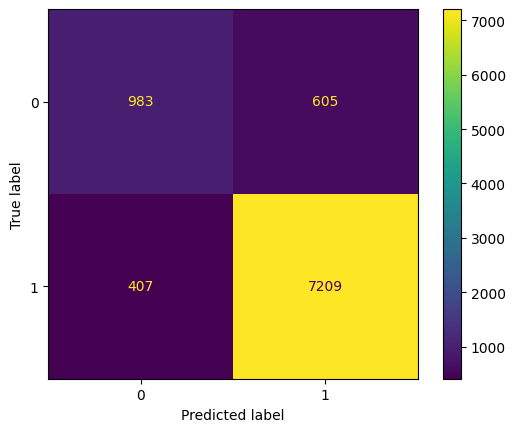

In [25]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
# Acceder a las etiquetas de predicción:
predictions = trainer.predict(test_dataset)
y_pred = predictions.predictions.argmax(axis=1)
y_true = [x["labels"].item() for x in test_dataset]

# Ver las métricas de clasificación:
print(classification_report(y_true,y_pred))
ConfusionMatrixDisplay.from_predictions(y_true=y_true, y_pred=y_pred)

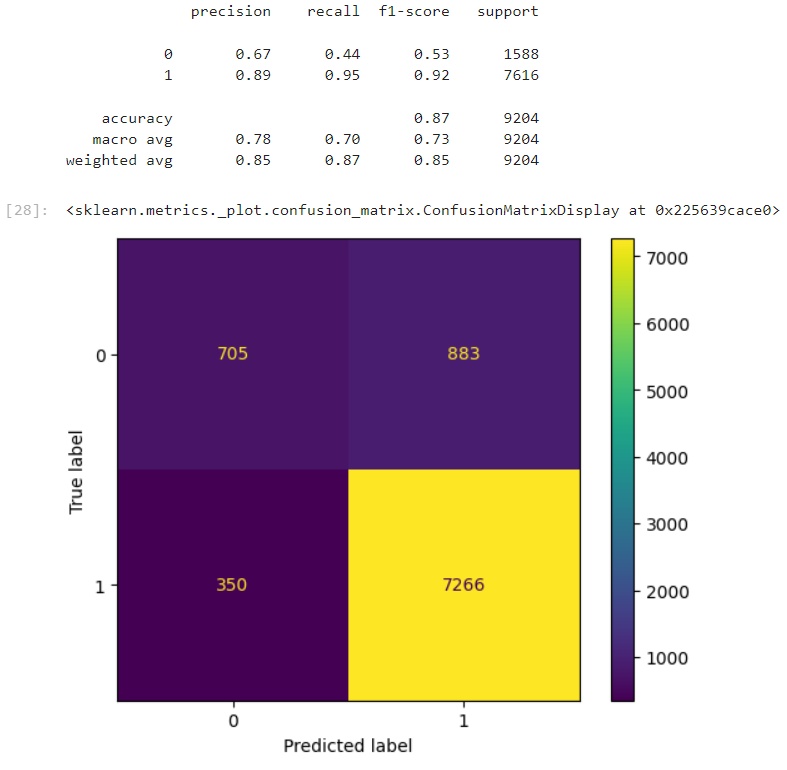

In [8]:
# Cargamos captura de las métricas del lightGBM tuenado
#con datos originales (no balanceados):
from IPython.display import Image, display

display(Image('Images/lgbm_best_metricas.png'))

Observaciones:
- Se ha llevado a cabo la tarea de clasificación con modelo de lenguaje BERT reciclando código del notebook de ejericio de clase con Modelos de Lenguaje (falta de conocimiento personal de redes neuronales).

- Se compara la capacidad predictiva del modelo BERT con la del LightGBM con los datos originales (no balanceadas) puesto que el modelo de lenguaje se entrenó también con datos no balanceadas!

- En cuanto a los resultados de la predicción, BERT, sin sorpresas, supera a LightBGM tuneado en todas las métricas: accuracy (0.89 > 0.87), f1-score para clase negativa (0.66 > 0.53), f1-score para clase positiva (0.93 > 0.92).